## Simple Graph (AI Agent)

### Installation

In [1]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic

### Graph State

In [2]:
from typing import TypedDict


class State(TypedDict):
    graph_msg: str

### Nodes Functions

In [4]:
def node_01(state: State):
    print(f"Node 01: {state['graph_msg']}")
    # Override the graph state (graph_msg)
    return {"graph_msg": state["graph_msg"] + " node_01"}


def node_02(state: State):
    print(f"Node 02: {state['graph_msg']}")
    # Override the graph state (graph_msg)
    return {"graph_msg": state["graph_msg"] + " node_02"}


def node_03(state: State):
    print(f"Node 03: {state['graph_msg']}")
    # Override the graph state (graph_msg)
    return {"graph_msg": state["graph_msg"] + " node_03"}

### Building Graph

In [5]:
from langgraph.graph import StateGraph, END, START

In [6]:
import random
from typing import Literal

def select_next_node(state: State) -> Literal["node_02", "node_03"]:
    next_node = random.choice(["node_02", "node_03"])
    
    print(f"Selected node: {next_node}")
    return next_node

In [8]:
# Create builder
builder = StateGraph(State)

# Graph nodes
builder.add_node("node_01", node_01)
builder.add_node("node_02", node_02)
builder.add_node("node_03", node_03)


# Add edge
builder.add_edge(START, "node_01")
builder.add_conditional_edges("node_01", select_next_node)
builder.add_edge("node_02", END)
builder.add_edge("node_03", END)

graph = builder.compile()

### Visualize Graph

In [9]:
from IPython.display import display, Image

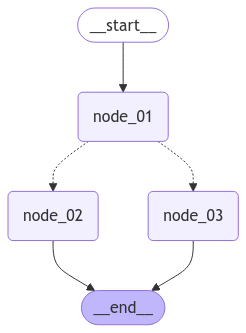

In [10]:
display(Image(graph.get_graph().draw_mermaid_png()))

### Invoke Graph

In [13]:
response = graph.invoke({"graph_msg": "Hello"})

Node 01: Hello
Selected node: node_03
Node 03: Hello node_01


In [14]:
response

{'graph_msg': 'Hello node_01 node_03'}